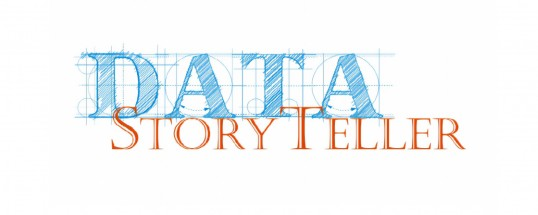

#                Car Price Prediction using Machine Learning with Python.

### About Dataset

This dataset contains information about used cars.

This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

The columns in the given dataset are as follows:

1. name

2. year

3. selling_price

4. km_driven 

5. fuel

6. seller_type

7. transmission

8. Owner

### Data Link: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

##### Loading important libraries:

In [50]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')

##### Data Collection and Preprocessing:

In [51]:
df = pd.read_csv('car data.csv') # read data

# df.head() # show top 5 rows

In [52]:
df.head() # Get the first 3 rows


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [53]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [54]:
df.tail() # last 5 rows

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [55]:
df.tail(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [56]:
df.tail(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
300,brio,2016,5.3,5.9,5464,Petrol,Dealer,Manual,0


In [57]:
df.shape # show number of rows and columns

(301, 9)

In [58]:
df.info() # show information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [59]:
df.duplicated().sum() # Check for duplicate rows

2

In [62]:
df.drop_duplicates(inplace=True) # remove duplicate rows

In [63]:
df.duplicated().sum() 

0

In [64]:
df.shape

(299, 9)

In [65]:
df.isnull().sum() # Check for missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.info()

In [66]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [67]:
df['Fuel_Type'].value_counts() # checking the unique values in the Fuel_Type column

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [68]:
df['Seller_Type'].value_counts() # Checking the unique values in the Seller_Type column

Dealer        193
Individual    106
Name: Seller_Type, dtype: int64

In [69]:
df['Transmission'].value_counts() # Cheking the unique values in the Transmission column

Manual       260
Automatic     39
Name: Transmission, dtype: int64

##### Encoding the categorical data

In [70]:
df.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2}}, inplace = True)

In [71]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0


In [72]:
df.replace({'Transmission' : {'Automatic' : 1, 'Manual' : 0}}, inplace = True) # 1 = Automatic, 0 = Manual

In [73]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,0,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,0,0


In [74]:
df.replace({'Seller_Type' :{'Individual':0,'Dealer':1}},inplace=True)

In [77]:
df['Owner'].value_counts()

0    288
1     10
3      1
Name: Owner, dtype: int64

In [75]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,1,0,0
6,ciaz,2015,6.75,8.12,18796,0,1,0,0
7,s cross,2015,6.50,8.61,33429,1,1,0,0
8,ciaz,2016,8.75,8.89,20273,1,1,0,0
9,ciaz,2015,7.45,8.92,42367,1,1,0,0


##### Splitting the data into Features and Target

In [78]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [79]:
X.shape

(299, 7)

In [80]:
y.shape

(299,)

##### Splitting the data into train and test


In [81]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_train.shape

(239, 7)

In [84]:
X_test.shape

(60, 7)

In [86]:
y_train.shape

(239,)

In [87]:
y_test.shape

(60,)

##### Model Training.

1. Linear Regression

  Simple Linear Regression: Predicts the target variable using a single feature.
  
  Multiple Linear Regression: Predicts the target variable using multiple features.
  

2. Lasso Regression

  Adds a penalty equal to the sum of the absolute values of the coefficients to the linear regression   objective, which can result in sparse models.
  

3. XGB Regressor

  An optimized version of gradient boosting with performance improvements and additional features.

In [88]:
from sklearn.linear_model import LinearRegression # importing LinearRegression
lin_reg_model = LinearRegression() # creating an object for LinearRegression
lin_reg_model.fit(X_train, y_train) # training the model

LinearRegression()

##### 1. Linear Regression (Using Multiple Linear Regression)

In [89]:
training_data_prediction = lin_reg_model.predict(X_train) # predicting 'y_train' values


##### Model evaluation for training data using Linear Regression

##### R Squared Error for training data

In [ ]:
from sklearn import metrics

In [90]:
error_score = metrics.r2_score(y_train, training_data_prediction) # comparing 'y_train' and 'training_data_prediction'
print("R squared Error : ", error_score) # printing R squared Error

R squared Error :  0.9030168541189875


##### Visualization the actual prices and predicted prices for training data

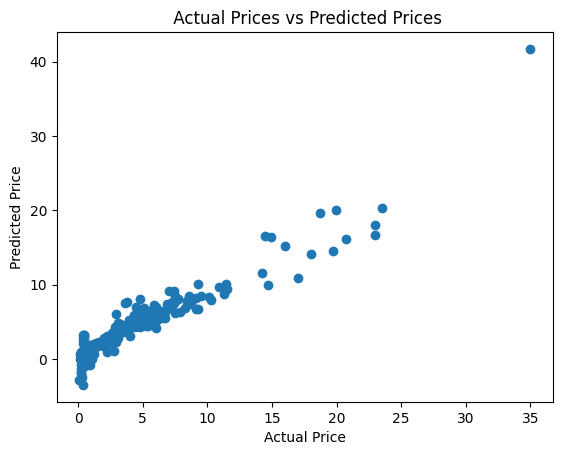

In [91]:
plt.scatter(y_train, training_data_prediction) # plotting y_train and training_data_prediction
plt.xlabel("Actual Price") # x label
plt.ylabel("Predicted Price") # y label
plt.title(" Actual Prices vs Predicted Prices") # title
plt.show() # showing the plot

##### Model Evaluation for Test Data using Linear Regression

In [92]:
test_data_prediction = lin_reg_model.predict(X_test) # predicting 'y_test' values

##### R Squared Error for test data

In [93]:
error_score = metrics.r2_score(y_test, test_data_prediction) # comparing 'y_test' and 'test_data_prediction'
print("R squared Error : ", error_score) # printing R squared Error

R squared Error :  0.7410829335730327


##### Visualization the actual prices and predicted prices for the test data

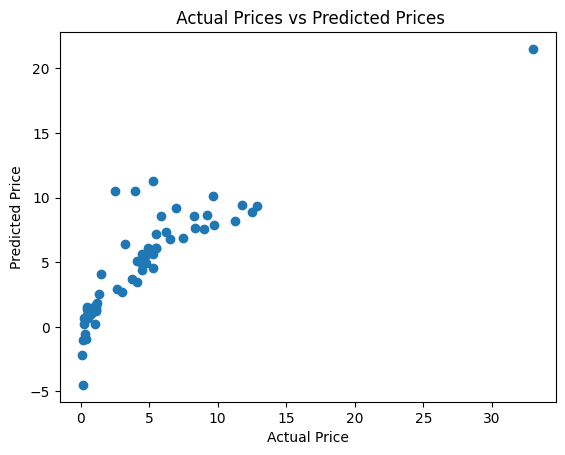

In [94]:
plt.scatter(y_test, test_data_prediction) # plotting y_test and test_data_prediction
plt.xlabel("Actual Price") # x label
plt.ylabel("Predicted Price") # y label
plt.title(" Actual Prices vs Predicted Prices") # title
plt.show() # showing the plot

##### 2. Lasso Regression

In [95]:
from sklearn.linear_model import Lasso # importing Lasso
lass_reg_model = Lasso() # creating an object for Lasso
lass_reg_model.fit(X_train, y_train) # training the model

Lasso()

##### Model Evaluation for Training Data using Lasso

In [96]:
training_data_prediction = lass_reg_model.predict(X_train) # predicting 'y_train' values

##### R Squared Error for training data

In [97]:
# R Squared Error
from sklearn import metrics # importing metrics
error_score = metrics.r2_score(y_train, training_data_prediction) # comparing 'y_train' and 'training_data_prediction'
print("R squared Error : ", error_score) # printing R squared Error

R squared Error :  0.8672182408625037


##### Visualization the actual prices and predicted prices for training data

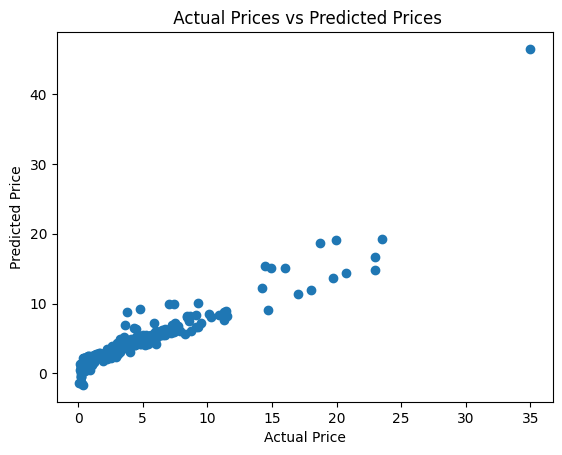

In [98]:
# Visualization the actual prices and predicted prices
plt.scatter(y_train, training_data_prediction) # plotting y_train and training_data_prediction
plt.xlabel("Actual Price") # x label
plt.ylabel("Predicted Price") # y label
plt.title(" Actual Prices vs Predicted Prices") # title
plt.show() # showing the plot

##### Model Evaluation for Test Data using Lasso

In [99]:
test_data_prediction = lass_reg_model.predict(X_test) # predicting 'y_test' values

##### R Squared Error for test data

In [100]:
error_score = metrics.r2_score(y_test, test_data_prediction) # comparing 'y_test' and 'test_data_prediction'
print("R squared Error : ", error_score) # printing R squared Error

R squared Error :  0.7026010642192582


##### Visualization the actual prices and predicted prices for the test data

##### 3. XGB Regressor 

##### Model Evaluation using XGBoost Regressor

In [101]:
from xgboost import XGBRegressor # importing XGBRegressor
xgb_reg_model = XGBRegressor() # creating an object for XGBRegressor
xgb_reg_model.fit(X_train, y_train) # training the model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

##### Model Evaluation for Training Data using XGBRegressor

In [102]:
training_data_prediction = xgb_reg_model.predict(X_train) # predicting 'y_train' values

##### R squared error for training data

In [103]:
# R Squared Error
from sklearn import metrics # importing metrics
error_score = metrics.r2_score(y_train, training_data_prediction) # comparing 'y_train' and 'training_data_prediction'
print("R squared Error : ", error_score) # printing R squared Error

R squared Error :  0.9999963189676544


##### Visualization the actual prices and predicted prices for Training Data

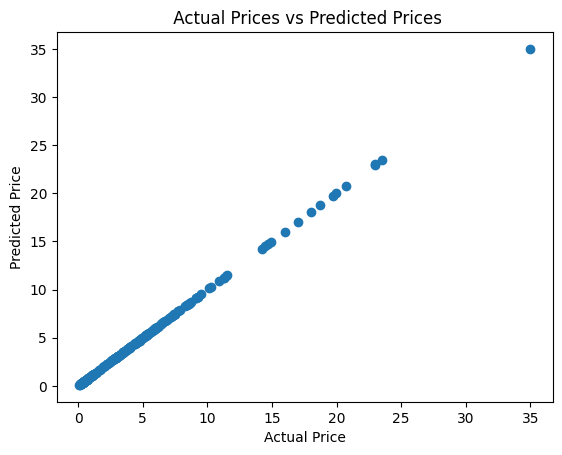

In [104]:
plt.scatter(y_train, training_data_prediction) # plotting y_train and training_data_prediction
plt.xlabel("Actual Price") # x label
plt.ylabel("Predicted Price") # y label
plt.title(" Actual Prices vs Predicted Prices") # title
plt.show() # showing the plot

##### Model Evaluation for test data using XGBoost Regressor

In [105]:
test_data_prediction = xgb_reg_model.predict(X_test) # predicting 'y_test' values

##### R Squared Error for test data

In [107]:
error_score = metrics.r2_score(y_test, test_data_prediction) # comparing 'y_test' and 'test_data_prediction'
print("R squared Error : ", error_score) # printing R squared Error

R squared Error :  0.6348971707359481


##### Visualization the actual prices and predicted prices for test data

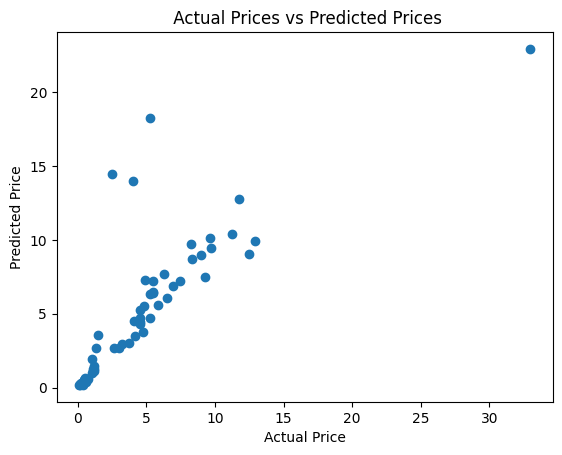

In [106]:
plt.scatter(y_test, test_data_prediction) # plotting y_test and test_data_prediction
plt.xlabel("Actual Price") # x label
plt.ylabel("Predicted Price") # y label
plt.title(" Actual Prices vs Predicted Prices") # title
plt.show() # showing the plot

In [108]:
# Best Model selectio for testing the model
print("Linear Regression Model : ",lin_reg_model.score(X_train,y_train)) # LinearRegression
print("Lasso Regression Model : ",lass_reg_model.score(X_train,y_train)) # Lasso
print("XGBRegressor Model : ",xgb_reg_model.score(X_train,y_train)) # XGBRegressor

Linear Regression Model :  0.9030168541189875
Lasso Regression Model :  0.8672182408625037
XGBRegressor Model :  0.9999963189676544


In [109]:
# Bset Model selectio for testing the model
print("Linear Regression Model : ",lin_reg_model.score(X_test,y_test)) # LinearRegression
print("Lasso Regression Model : ",lass_reg_model.score(X_test,y_test)) # Lasso
print("XGBRegressor Model : ",xgb_reg_model.score(X_test,y_test)) # XGBRegressor


Linear Regression Model :  0.7410829335730327
Lasso Regression Model :  0.7026010642192582
XGBRegressor Model :  0.6348971707359481


##### Predicting system

In [110]:
import pickle
filename = 'car_price_prediction_model.pkl'
pickle.dump(lin_reg_model, open(filename, 'wb'))